### 190234E HEWASURA G.I.

### EN2550 Assignment 1 on Intensity Transformations and Neighborhood Filtering

### (01)

([], [])

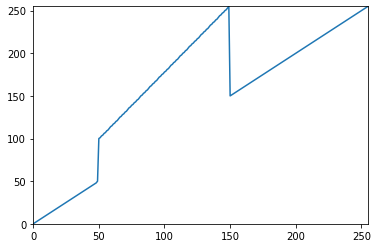

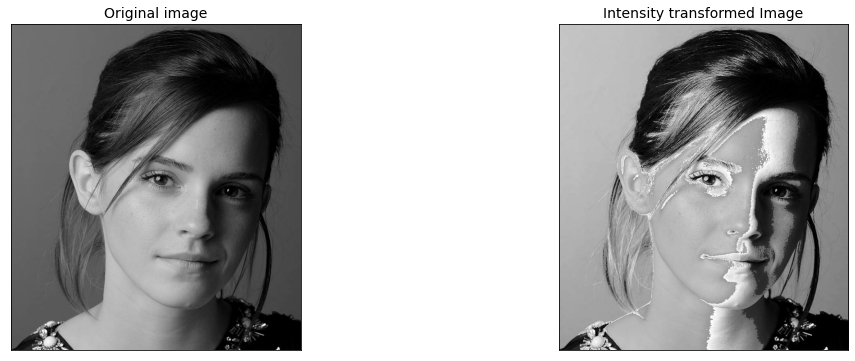

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = cv.imread(r"./emma_gray.jpg", cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,106)

img = cv.cvtColor(f, cv.COLOR_BGR2RGB)

t = np.concatenate((t1,t2,t3),axis = 0).astype(np.uint8)

plt.plot(t)
plt.xlim(0,255)
plt.ylim(0,255)

g = cv.LUT(img ,t)
image = cv.cvtColor(g, cv.COLOR_BGR2RGB)

fig, axes = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,6))

axes[0].imshow(f, cmap='gray',vmin=0,vmax=255)
axes[0].set_title("Original image",fontsize = 14)
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(image, cmap='gray')
axes[1].set_title('Intensity transformed Image',fontsize = 14)
axes[1].set_xticks([]), axes[1].set_yticks([])

### (02)

([], [])

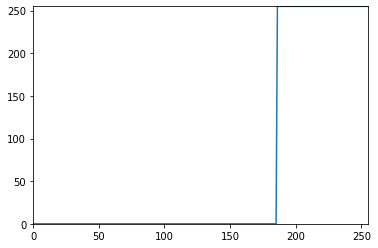

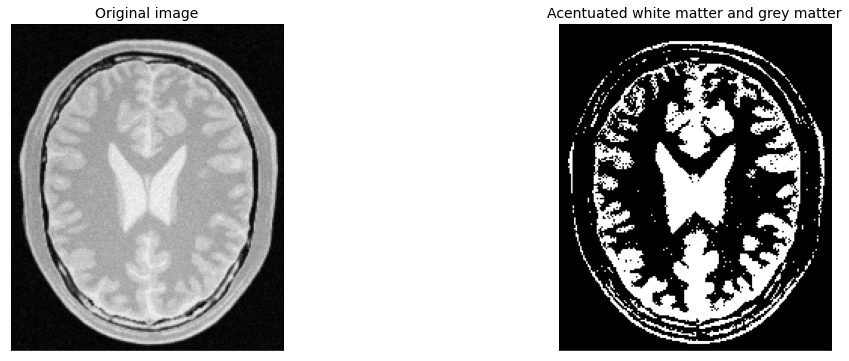

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = cv.imread(r"./brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
assert f is not None

t1_ = np.linspace(0,0,186)
t2_ = np.linspace(255,255,70)

img = cv.cvtColor(f, cv.COLOR_BGR2RGB)

t1 = np.concatenate((t1_,t2_),axis = 0).astype(np.uint8)

plt.plot(t1)
plt.xlim(0,255)
plt.ylim(0,255)

g1 = cv.LUT(img ,t1)
image1 = cv.cvtColor(g1, cv.COLOR_BGR2RGB)

fig, axes = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,6))

axes[0].imshow(f, cmap='gray',vmin=0,vmax=255)
axes[0].set_title("Original image",fontsize = 14)
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(image1, cmap='gray')
axes[1].set_title('Acentuated white matter and grey matter',fontsize = 14)
axes[1].set_xticks([]), axes[1].set_yticks([])


([], [])

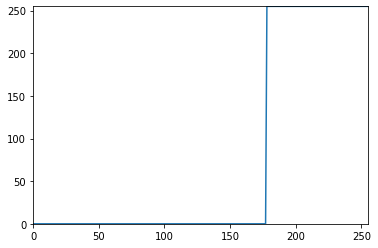

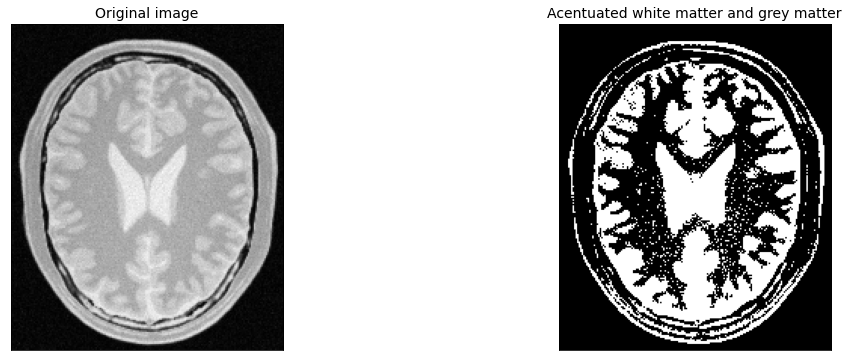

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = cv.imread(r"./brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
assert f is not None

t1_ = np.linspace(0,0,178)
t2_ = np.linspace(255,255,78)

img = cv.cvtColor(f, cv.COLOR_BGR2RGB)

t1 = np.concatenate((t1_,t2_),axis = 0).astype(np.uint8)

plt.plot(t1)
plt.xlim(0,255)
plt.ylim(0,255)

g1 = cv.LUT(img ,t1)
image1 = cv.cvtColor(g1, cv.COLOR_BGR2RGB)

fig, axes = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,6))

axes[0].imshow(f, cmap='gray',vmin=0,vmax=255)
axes[0].set_title("Original image",fontsize = 14)
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(image1, cmap='gray')
axes[1].set_title('Acentuated white matter and grey matter',fontsize = 14)
axes[1].set_xticks([]), axes[1].set_yticks([])

### (03)

[[ 8 10  7]
 [ 8 10  7]
 [15 17 14]
 ...
 [23 23 15]
 [26 26 16]
 [28 28 18]]
[[ 8 10  7]
 [ 8 10  7]
 [15 17 14]
 ...
 [23 23 15]
 [26 26 16]
 [28 28 18]]


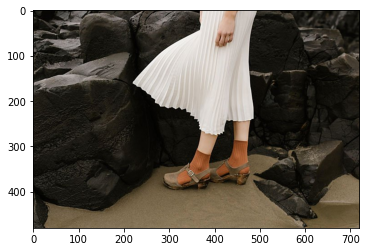

In [8]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = cv.imread(r"./highlights_and_shadows.jpg", cv.IMREAD_COLOR)
assert f is not None

img = cv.cvtColor(f, cv.COLOR_BGR2RGB)
f, axarr = plt.subplots()
axarr.imshow(img)
gamma = [0.2,0.8,1.2,2]
for i in gamma:
    t = np.array([(p/255)**i*255 for p in range(0,256)]).astype(np.uint8)
print(img[0])
for j in range(0,len(img)):
    for k in range(0,len(img[0])):
        img[i][j][0] = t[img[i][j][0]]   

print(img[0])
